In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=e51d4ee57ec3c72f16e13141fd4f388db01596d82710ee35bb7c06ca0d777497
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import xmltodict
xmlDirectory = 'annotations'
xmlPaths = glob.glob(xmlDirectory+'/*.xml')

from PIL import Image
for xmlPath in xmlPaths:
    with open(xmlPath) as fd:
        doc = xmltodict.parse(fd.read())
        print(doc)
        size = (int(doc['annotation']['size']['width']), int(doc['annotation']['size']['height']))
#         print(size)
        blank_image = np.zeros((size[1],size[0],3), np.uint8)
#         from PIL import Image
#         blank_image = Image.new('RGB', size)
#         print(blank_image)
        filename = 'archive/new_segments/'+doc['annotation']['filename']
        if(type(doc['annotation']['object'])) is list:
            for obj in doc['annotation']['object']:
                category = obj['name']
                bndbox = obj['bndbox']
                x1 = int(bndbox['xmin'])
                x2 = int(bndbox['xmax'])
                y1 = int(bndbox['ymin'])
                y2 = int(bndbox['ymax'])
                bndbox['label'] = category
                if category == 'with_mask' or category == 'mask_weared_incorrect':
                    mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (200,50,145), -1)
                elif category == 'without_mask':
                    mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (150,150,90), -1)
#                 elif category == 'mask_weared_incorrect':
#                     mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (90,150,200), -1)

            # filename = 'archive/segments/maksssksksss'+str(i)+'.jpg'
            cv2.imwrite(filename, blank_image)
        else:
            bndbox = doc['annotation']['object']['bndbox']
            category = obj['name']
            x1 = int(bndbox['xmin'])
            x2 = int(bndbox['xmax'])
            y1 = int(bndbox['ymin'])
            y2 = int(bndbox['ymax'])
            bndbox['label'] = category
            if category == 'with_mask' or category == 'mask_weared_incorrect':
                mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (200,50,145), -1)
            elif category == 'without_mask':
                mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (150,150,90), -1)
#             elif category == 'mask_weared_incorrect':
#                 mask_face = cv2.rectangle(blank_image, (x1,y1), (x2,y2), (255,255,255), -1)
            
            cv2.imwrite(filename, mask_face)


In [ ]:
from fastai.vision import *
import torch
import torch.nn as nn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['subplots', 'pad', 'partition', 'array', 'random', 'uniform', 'copy', '__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
path=Path('/content/drive/My Drive/archive')

In [ ]:
path_lbl = path/'segments'
path_img = path/'images'

In [ ]:
imageFileNames = get_image_files(path_img)
imageFileNames[:5]


[PosixPath('/content/drive/My Drive/archive/images/maksssksksss435.png'),
 PosixPath('/content/drive/My Drive/archive/images/maksssksksss439.png'),
 PosixPath('/content/drive/My Drive/archive/images/maksssksksss451.png'),
 PosixPath('/content/drive/My Drive/archive/images/maksssksksss429.png'),
 PosixPath('/content/drive/My Drive/archive/images/maksssksksss426.png')]

In [ ]:
label_names = get_image_files(path_lbl)
label_names[:5]

[PosixPath('/content/drive/My Drive/archive/segments/maksssksksss523.png'),
 PosixPath('/content/drive/My Drive/archive/segments/maksssksksss503.png'),
 PosixPath('/content/drive/My Drive/archive/segments/maksssksksss455.png'),
 PosixPath('/content/drive/My Drive/archive/segments/maksssksksss499.png'),
 PosixPath('/content/drive/My Drive/archive/segments/maksssksksss422.png')]

In [ ]:
get_label_image = lambda x: path_lbl/f'{x.stem}.png'

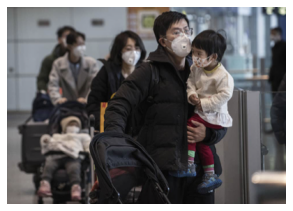

In [ ]:
img_f = imageFileNames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

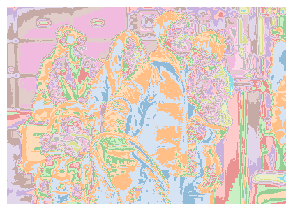

In [ ]:
label_img_path = get_label_image(img_f)
img = open_mask(img_f)
img.show(figsize=(5,5))

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['with_mask', 'without_mask'], dtype='<U12')

In [ ]:
def my_open(self,fn):
  return open_mask(fn, after_open=self.after_open,div=True);
SegmentationLabelList.open = my_open

In [ ]:
src = (SegmentationItemList
       .from_folder(path_img)
       .split_by_fname_file("valid.txt")
       .label_from_func(get_label_image,  classes=codes))

In [ ]:
# size = src_size
data = (src.transform(get_transforms(), tfm_y=True,size=(300,300))
        .databunch(bs=16)
        .normalize(imagenet_stats))

In [ ]:
data

ImageDataBunch;

Train: LabelList (827 items)
x: SegmentationItemList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: SegmentationLabelList
ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300)
Path: /content/drive/My Drive/archive/images;

Valid: LabelList (26 items)
x: SegmentationItemList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: SegmentationLabelList
ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300),ImageSegment (1, 300, 300)
Path: /content/drive/My Drive/archive/images;

Test: None

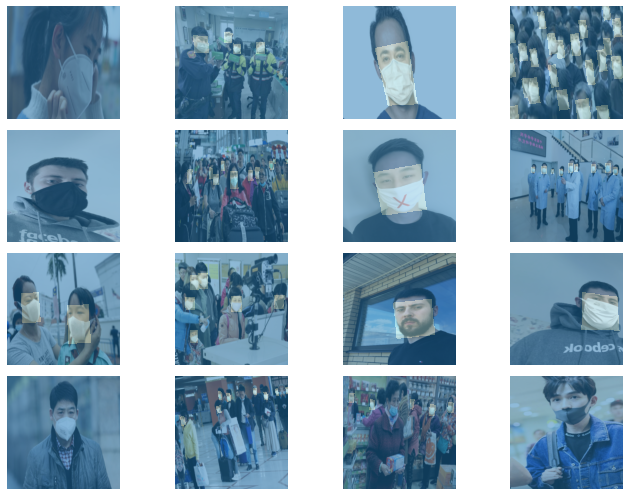

In [ ]:
data.show_batch(5, figsize=(10,7))

In [ ]:
learn = unet_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
def conv_trans(ni, nf, ks = 4, stride = 2, padding = 1):
    return nn.Sequential(
        nn.ConvTranspose2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding = padding), 
        nn.ReLU(inplace = True), 
        nn.BatchNorm2d(nf))

In [ ]:
custom_head=nn.Sequential(conv_trans(512, 256), 
                          conv_trans(256, 128),
                          conv_trans(128, 64),
                          conv_trans(64, 32), 
                          nn.ConvTranspose2d(32, 4, kernel_size=4, bias=False, stride=2, padding = 1))

In [ ]:
def pixel_accuracy(yhat, y):
    y_=y.squeeze(dim=1)
    yhat_=yhat.argmax(dim=1)
    return (y_==yhat_).sum().float()/y.numel() 

In [ ]:
learn=cnn_learner(data, models.resnet18, custom_head=custom_head, metrics=pixel_accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


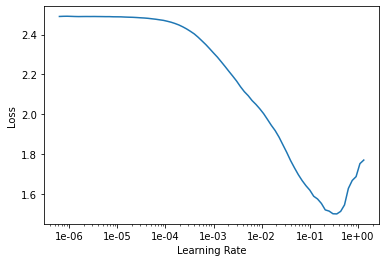

In [ ]:
learn.recorder.plot()

In [ ]:
lr=1e-2
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,pixel_accuracy,time
0,0.978494,0.160332,0.952200,05:19
1,0.398850,0.137424,0.949384,05:08
2,0.229931,0.102866,0.960639,05:10
3,0.171411,0.109911,0.957783,05:07


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


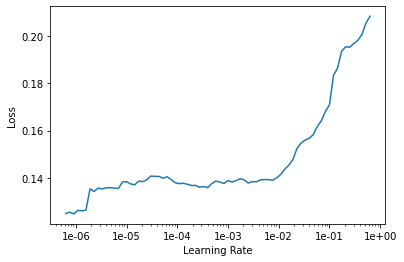

In [ ]:
learn.recorder.plot()

In [ ]:
lr=1e-6
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,pixel_accuracy,time
0,0.129472,0.101301,0.960807,06:33
1,0.130379,0.103358,0.959645,06:38
2,0.130316,0.100794,0.961280,06:35
3,0.131765,0.100018,0.960883,06:33
4,0.129883,0.102160,0.959664,06:34
5,0.130367,0.102563,0.959650,06:33
6,0.128716,0.101333,0.960611,06:33
7,0.129912,0.101222,0.960523,06:35


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.save('basic-segmentation')

In [ ]:
def blend_image_mask(im, mask, alpha=0.7):

  print(im)
  im_mask=np.zeros((im.shape[1], im.shape[2], 3), dtype='float32')
  for j in range(3): im_mask[:,:,j]=im.mean(axis=0)
  for j in range(1, 4):
      im_mask[mask==j] = alpha*im_mask[mask==j] + (1-alpha)*np.array([float(i==(j-1)) for i in range(3)])
  return im_mask

In [ ]:
def make_legend():
    custom_lines = [Line2D([0], [0], color='r', lw=2, alpha=0.5),
                    Line2D([0], [0], color='g', lw=2, alpha=0.5)]

    legend(custom_lines, ['with_mask', 'without_mask'])

In [ ]:
denorm=learn.data.denorm

In [ ]:
with torch.no_grad():
    x,y = next(iter(learn.data.valid_dl))
    yhat = to_np(learn.model(x))
    x=denorm(x)

In [ ]:
x.shape, y.shape, yhat.shape

(torch.Size([16, 3, 256, 256]),
 torch.Size([16, 1, 256, 256]),
 (16, 4, 256, 256))

In [ ]:
yhat=yhat.argmax(1)

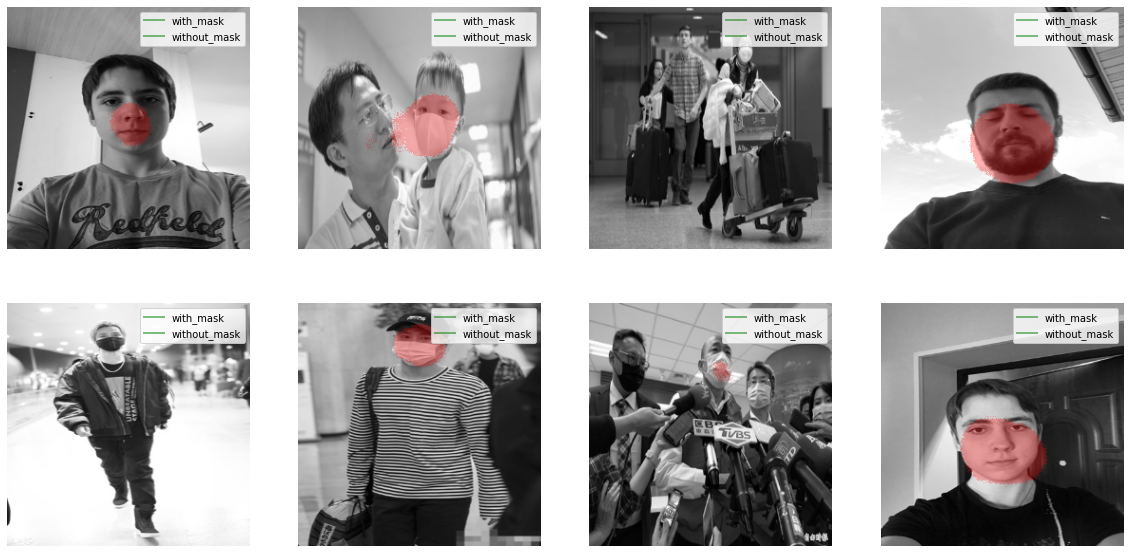

In [ ]:
fig=figure(0, (20, 10))

for i in range(8):
    fig.add_subplot(2,4,i+1)
    im_mask=blend_image_mask(to_np(x[i]), yhat[i])
    imshow(im_mask); axis('off'); make_legend()